This Jupyter Notebook runs calculate_histogram.py and create_combination.py

In [2]:
root_directory = '/Users/vojtechremis/Desktop/bachelorproject/'

In [3]:
import pandas as pd
import numpy as np
import os

#Importing shared modules from /Inc
import sys
sys.path += [root_directory+'Inc', 'Inc', root_directory+'1_GenerateFunction/Inc']
import log
Log = log.log()

import generate_function
from calculate_histogram import Distribution
from create_combinations import CreateCombinations
from Plots import plotCombinationGrid2D
from FolderManagement import createDirectory

experimentName = 'thesis'

# Load data

In [7]:
# Paths
rootFunctionPath = root_directory+f'1_GenerateFunction/generated_data/rootSamples_thesis.npz'
sampledFunctionPath = root_directory+f'1_GenerateFunction/generated_data/subsetSamples_thesis.npz'
experimentFolder = root_directory+f'2_GeneratingIntervals/Output/{experimentName}'


# Load data
SampledFunction = generate_function.SyntheticFunction(
    dimension=2,
    rootToLoad=rootFunctionPath,
    samplesToLoad=sampledFunctionPath
)

FundamentalData = pd.DataFrame(
    {
        'synthetic_indicator_one': SampledFunction.subset_axes[0],
        'synthetic_indicator_nd': SampledFunction.subset_axes[1],
        'relative_profit': SampledFunction.subset_values
    }
)

17:33:57	Samples file has been loaded.


# Create Histogram and CDF

17:30:49	Folder has been created [/Users/vojtechremis/Desktop/bachelorproject/2_GeneratingIntervals/Output/thesis].
17:30:49	Folder has been created [/Users/vojtechremis/Desktop/bachelorproject/2_GeneratingIntervals/Output/thesis/HISTOGRAMS].
17:30:49	Sorting synthetic_indicator_one
17:30:49	Processing row 0 out of 500
17:30:49	Folder has been created [/Users/vojtechremis/Desktop/bachelorproject/2_GeneratingIntervals/Output/thesis/CDF].
17:30:49	Calculating CDF for synthetic_indicator_one


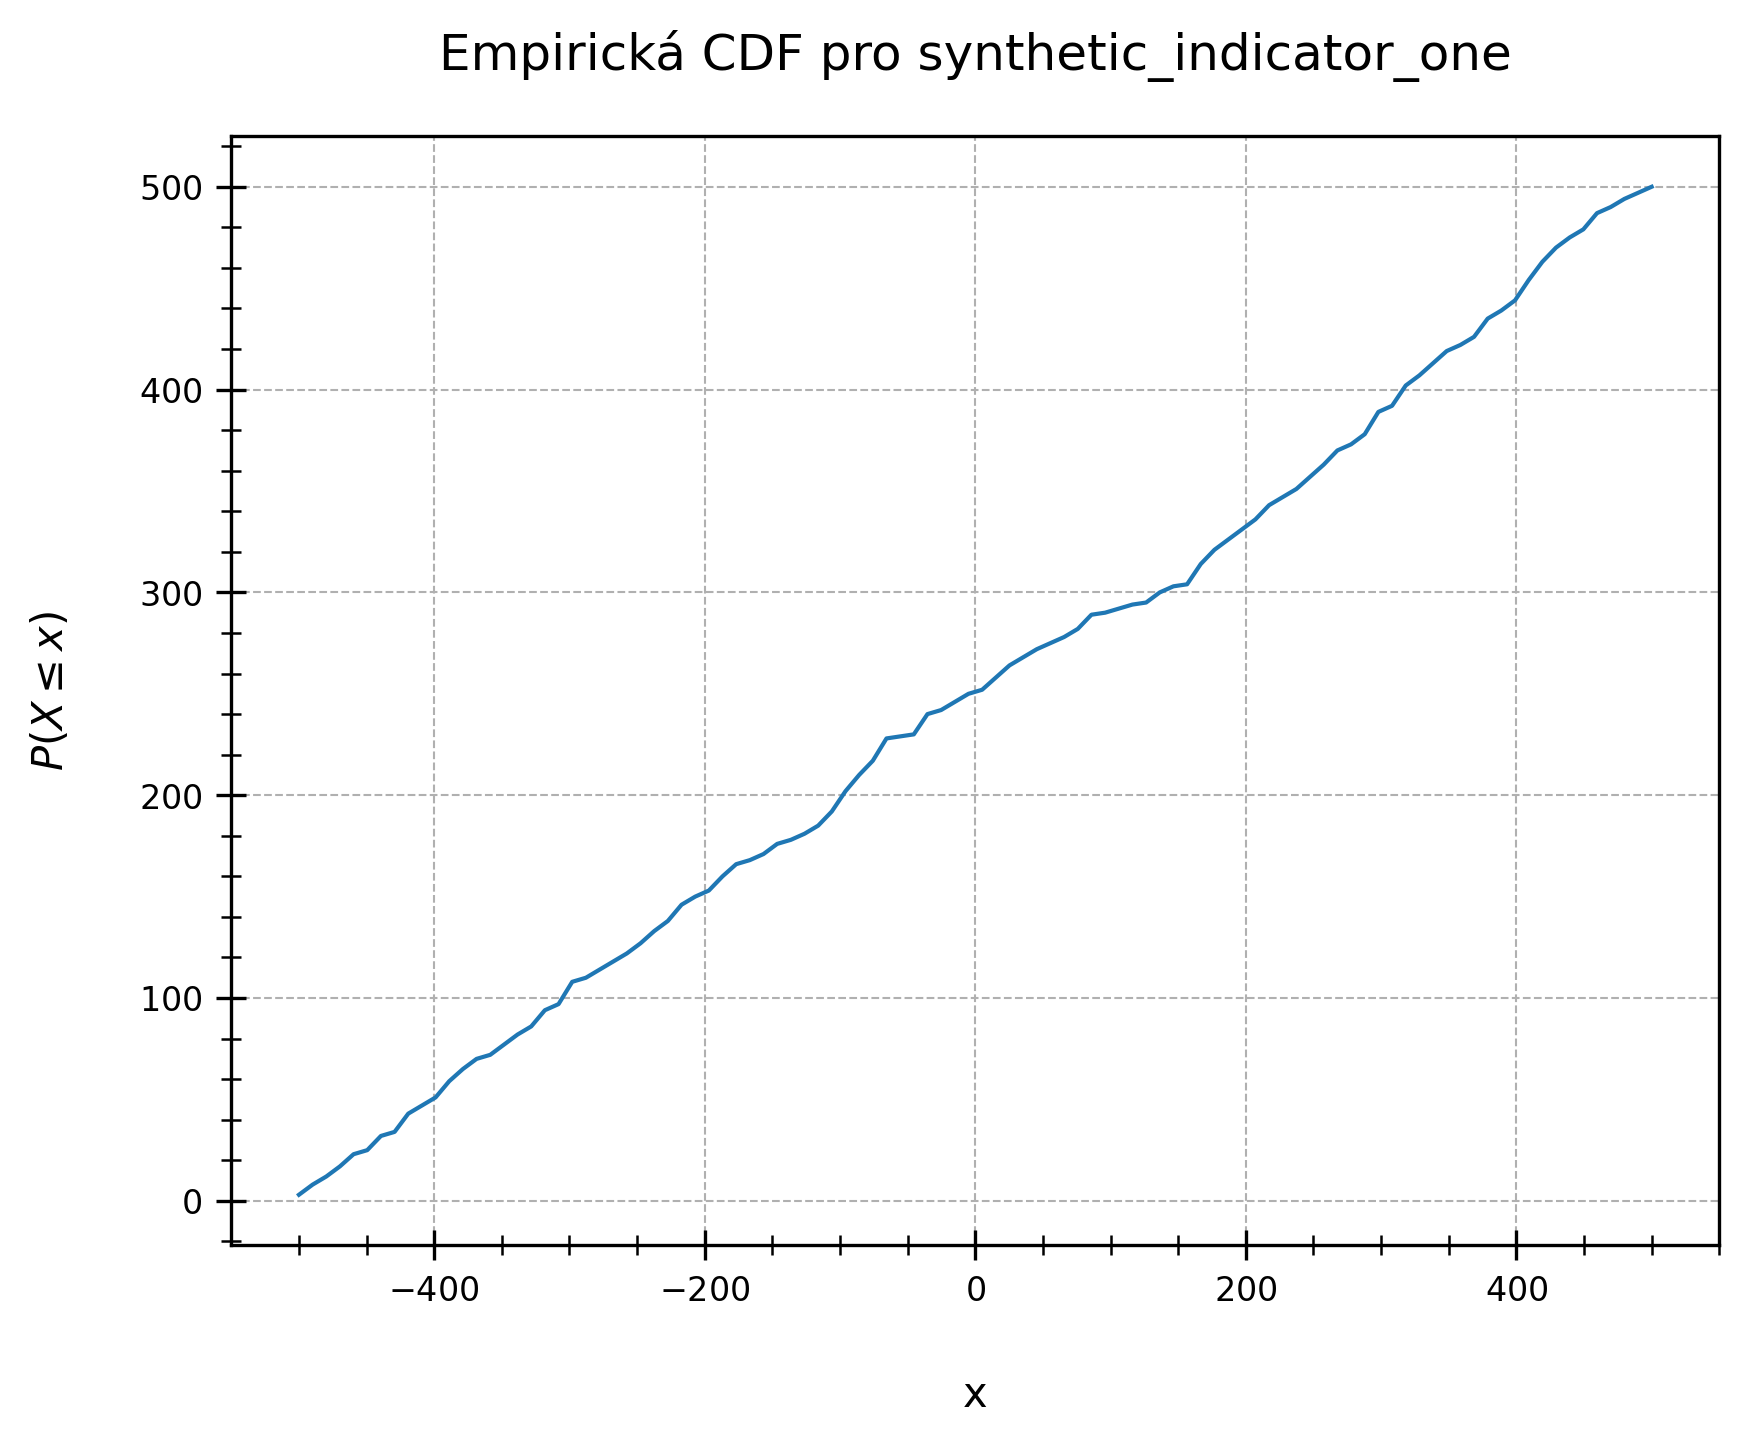

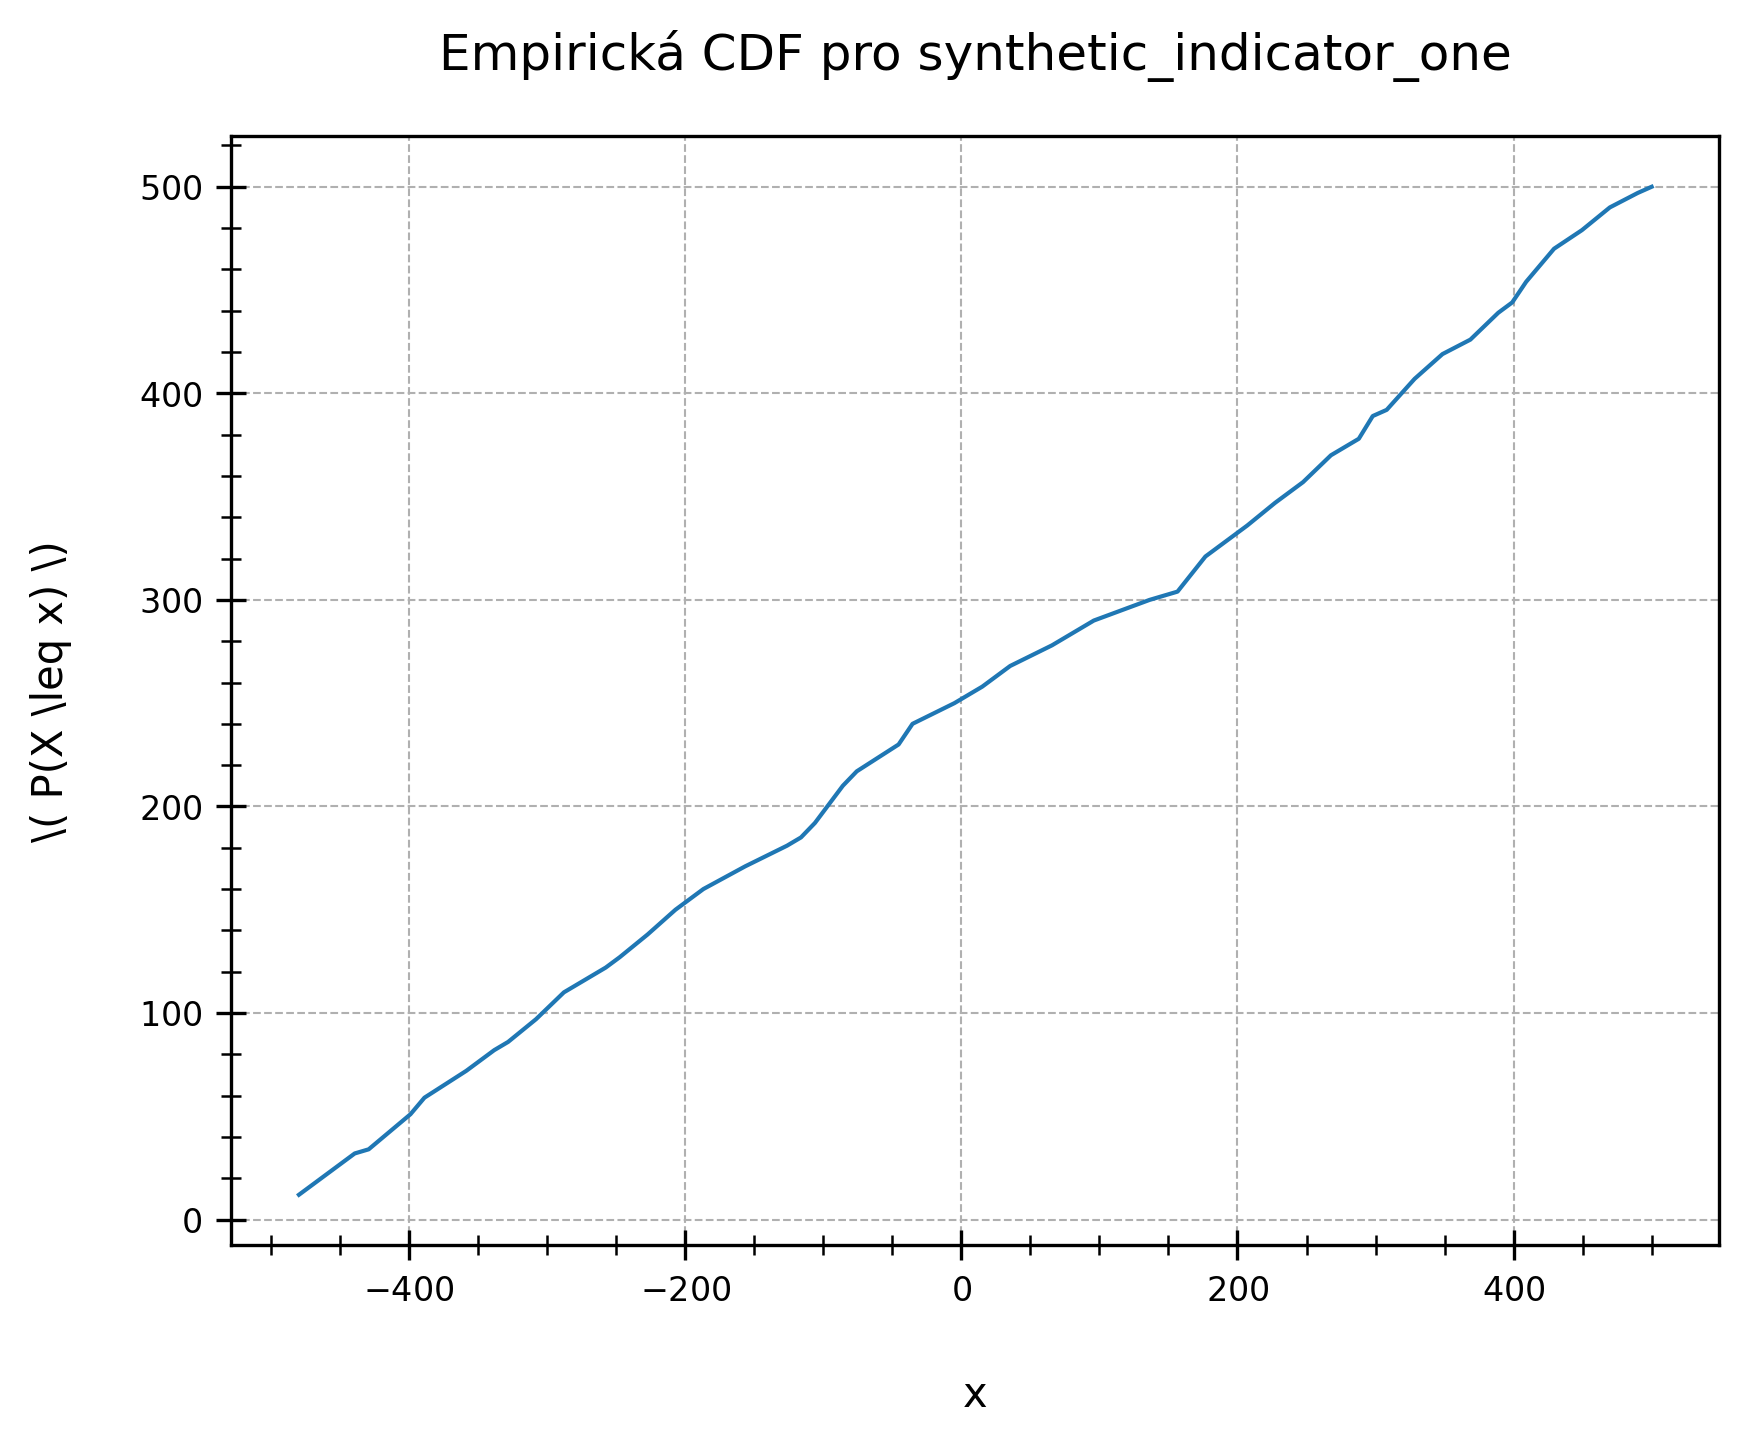

17:30:50	Sorting synthetic_indicator_nd
17:30:50	Processing row 0 out of 500
17:30:50	Calculating CDF for synthetic_indicator_nd


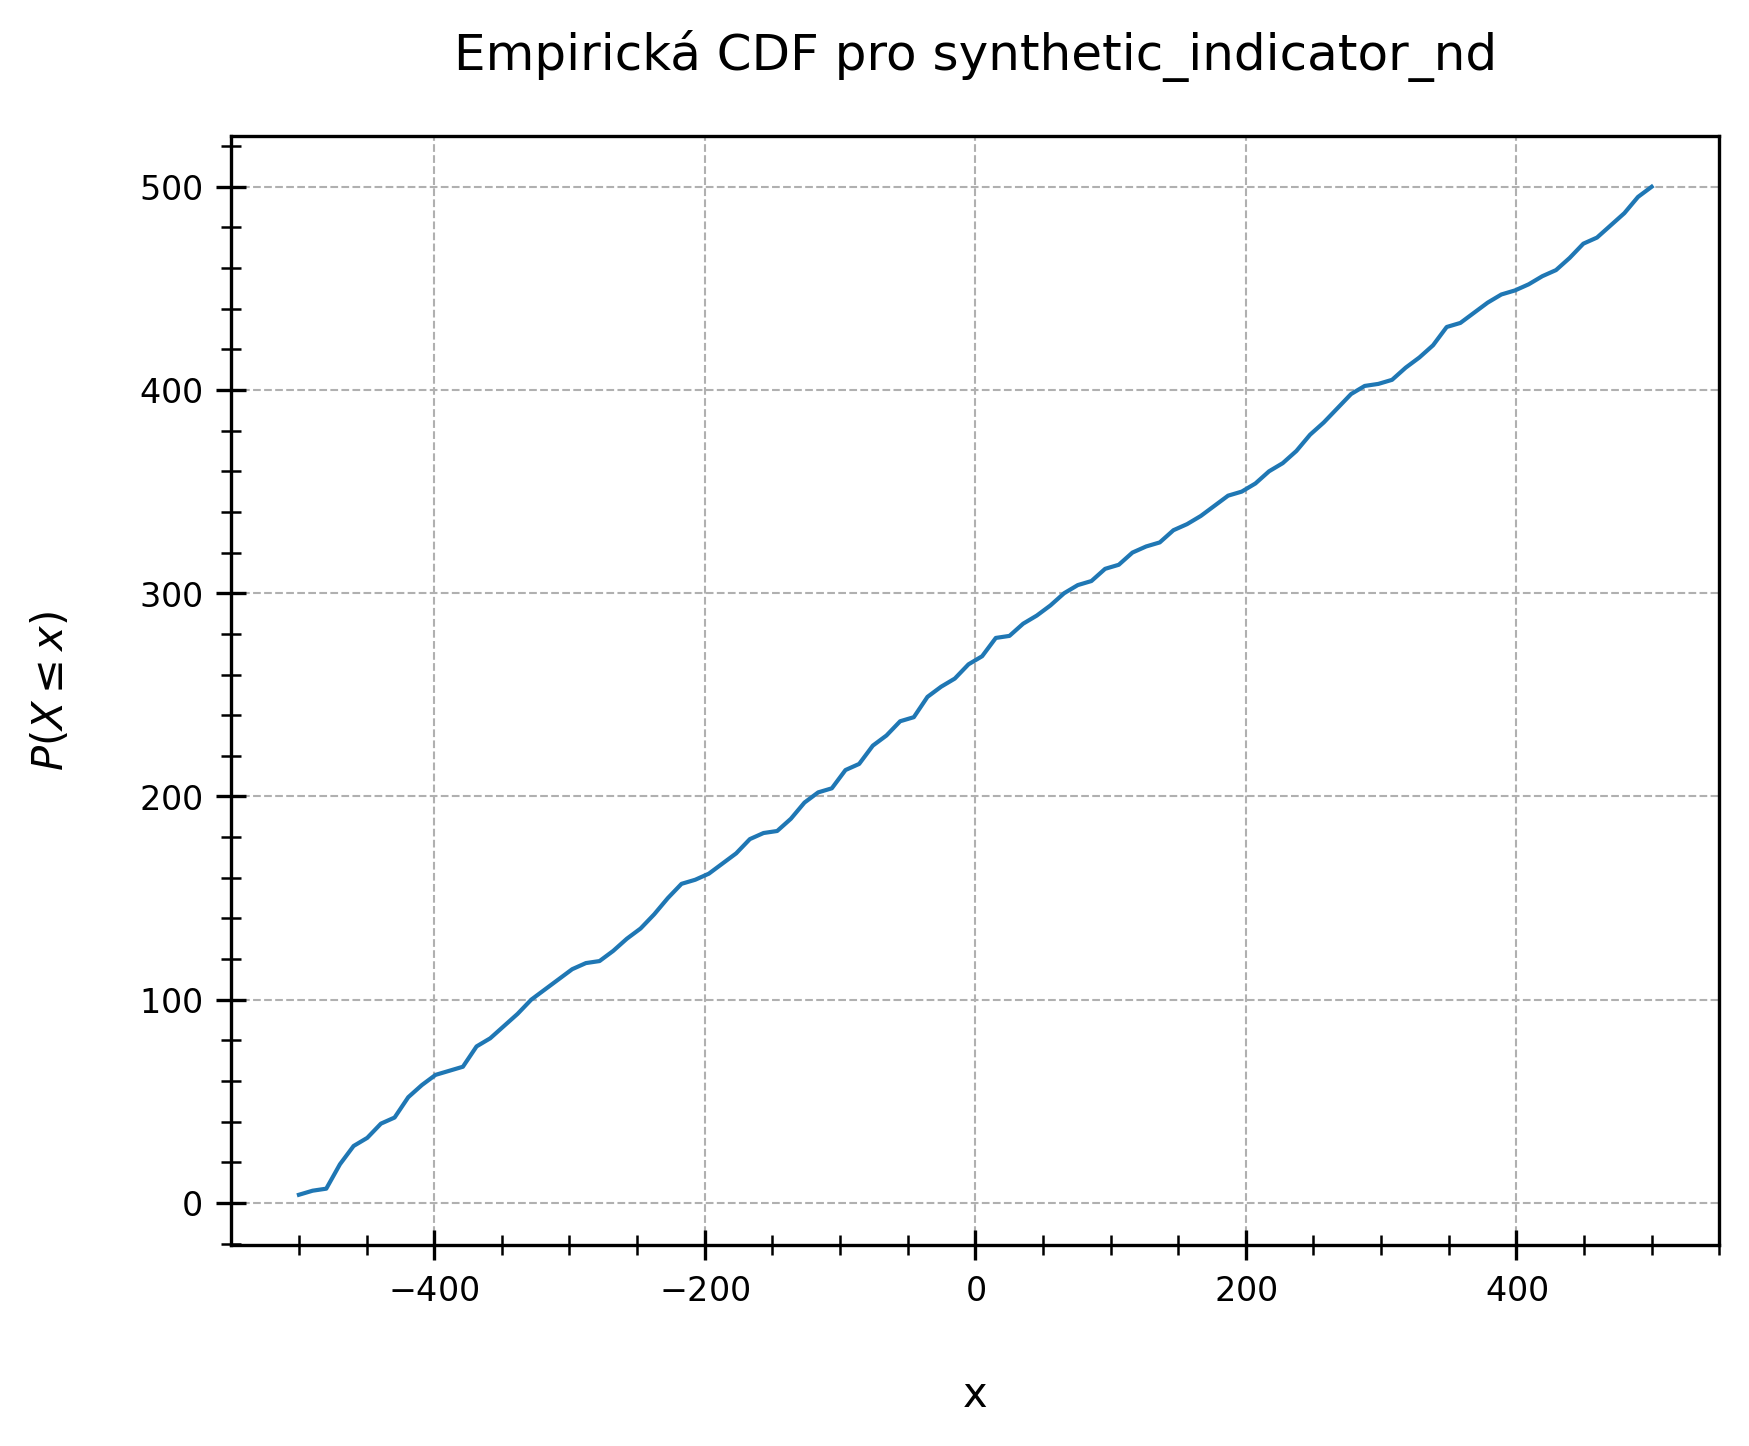

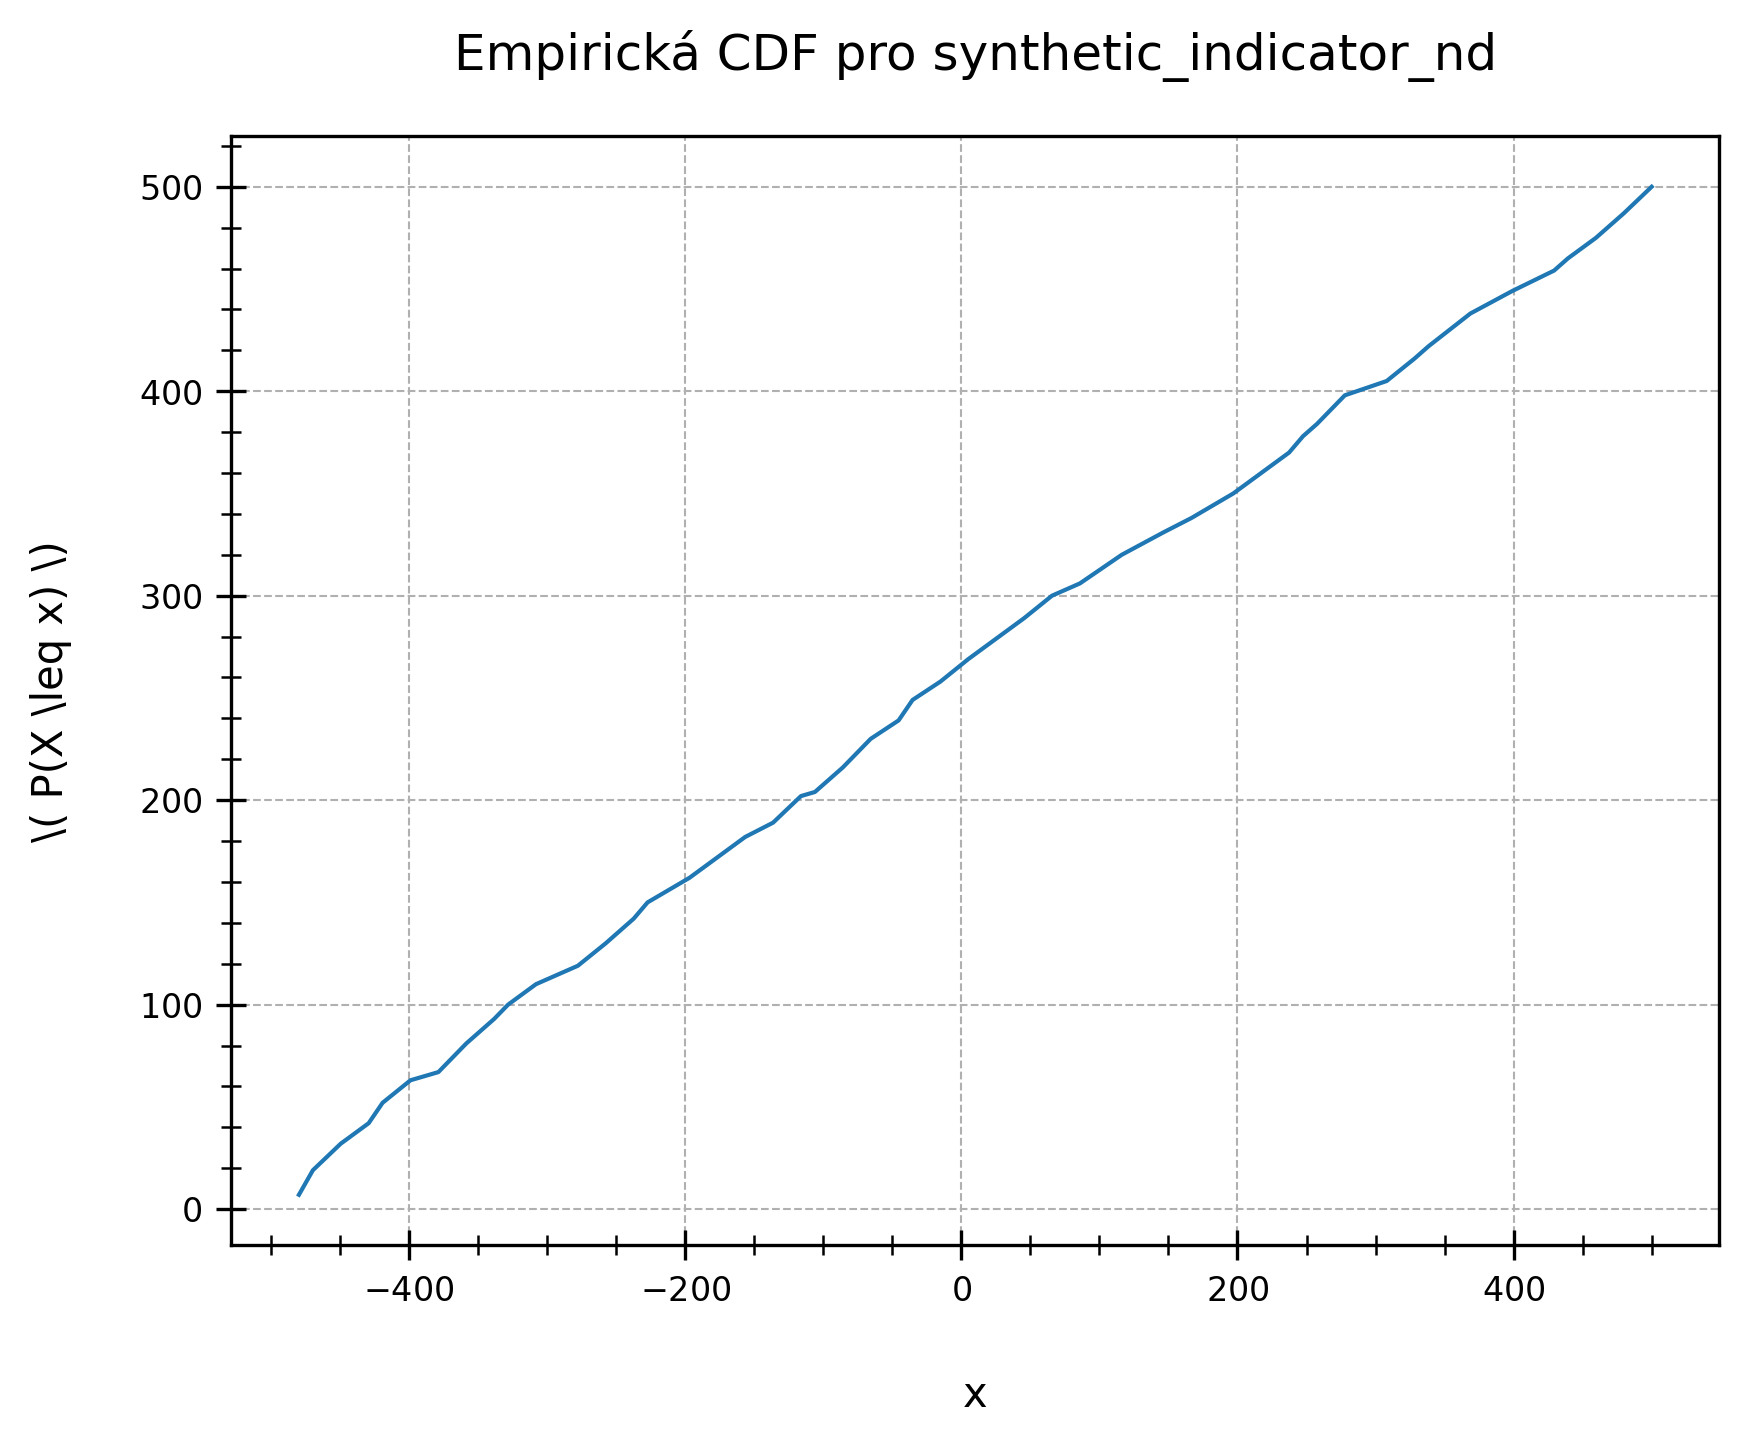

<Figure size 1920x1440 with 0 Axes>

In [5]:
# Create distributions
D = Distribution(FundamentalData, experimentFolder)

# First indicator
Hist = D.Histogram(indicatorName='synthetic_indicator_one', indicatorColumn=None, saveFile=True)
# CDF_ini = D.CDF(indicatorName='synthetic_indicator_one', indicatorHistogram=Hist, bins='ini', saveFile=True)
CDF = D.CDF(indicatorName='synthetic_indicator_one', indicatorHistogram=Hist, bins=50, saveFile=True)

# Second indicator
Hist = D.Histogram(indicatorName='synthetic_indicator_nd', indicatorColumn=None, saveFile=True)
# CDF_ini = D.CDF(indicatorName='synthetic_indicator_nd', indicatorHistogram=Hist, bins='ini', saveFile=True)
CDF = D.CDF(indicatorName='synthetic_indicator_nd', indicatorHistogram=Hist, bins=50, saveFile=True)

# Generating training data

In [9]:
# PARAMETERS
samples = 1000
intervals =  (0.05, 0.25)

intervalStretching = { # We may stretch intervals relatively to its dimensions
    'default': [0.05, 0.05]
}


createDirectory(experimentFolder+'/Combinations') # Creating folder for outputs

intervals_str = ",".join(map(str, intervals))
experimentPart = os.path.join(
    "{}_{}".format(
        "samples={}".format(samples),
        "intervals={}".format(intervals_str)
    )
)

experimentSetFolder = experimentFolder + '/Combinations/' + experimentPart

createDirectory(experimentSetFolder)

'Folder already exists [/Users/vojtechremis/Desktop/bachelorproject/2_GeneratingIntervals/Output/thesis/Combinations/samples=1000_intervals=0.05,0.25].'

In [6]:
syntheticFunction = np.load(sampledFunctionPath)
df = pd.DataFrame({'synthetic_indicator_one': syntheticFunction['axes'][0], 'synthetic_indicator_nd': syntheticFunction['axes'][1], 'relative_profit': syntheticFunction['values']})

cm = CreateCombinations(
    Dataset=df,
    numberOfSamples=samples,
    continuousIndicator_names=['synthetic_indicator_one', 'synthetic_indicator_nd'],
    categoricalndicator_names=[],
    CDFFolderPath=experimentFolder+'/CDF',
    intervalStretching=intervalStretching,
    IntervalLenLimits=intervals,
    exportFolderPath=experimentSetFolder,
    exportFileName='Combinations_Dataset',
    detailFileName='Combinations_Detail',
    samplesTreshold=5,
    tresholdFileFull=True
)

17:30:50	Indicator synthetic_indicator_one CDF loaded with size 51
17:30:50	Indicator synthetic_indicator_nd CDF loaded with size 50
17:30:50	Entry [0] finished.
17:30:50	Total number of empty selections = 1
17:30:50	Total number of empty selections = 2
17:30:50	Total number of empty selections = 3
17:30:50	Total number of empty selections = 4
17:30:50	Total number of empty selections = 5
17:30:51	Total number of empty selections = 6
17:30:51	Total number of empty selections = 7
17:30:51	Total number of empty selections = 8
17:30:51	Total number of empty selections = 9
17:30:51	Total number of empty selections = 10
17:30:51	Total number of empty selections = 11
17:30:51	Total number of empty selections = 12
17:30:51	Total number of empty selections = 13
17:30:51	Total number of empty selections = 14
17:30:51	Total number of empty selections = 15
17:30:51	Total number of empty selections = 16
17:30:51	Total number of empty selections = 17
17:30:51	Total number of empty selections = 18
1

# Plots

<Figure size 3000x1800 with 0 Axes>

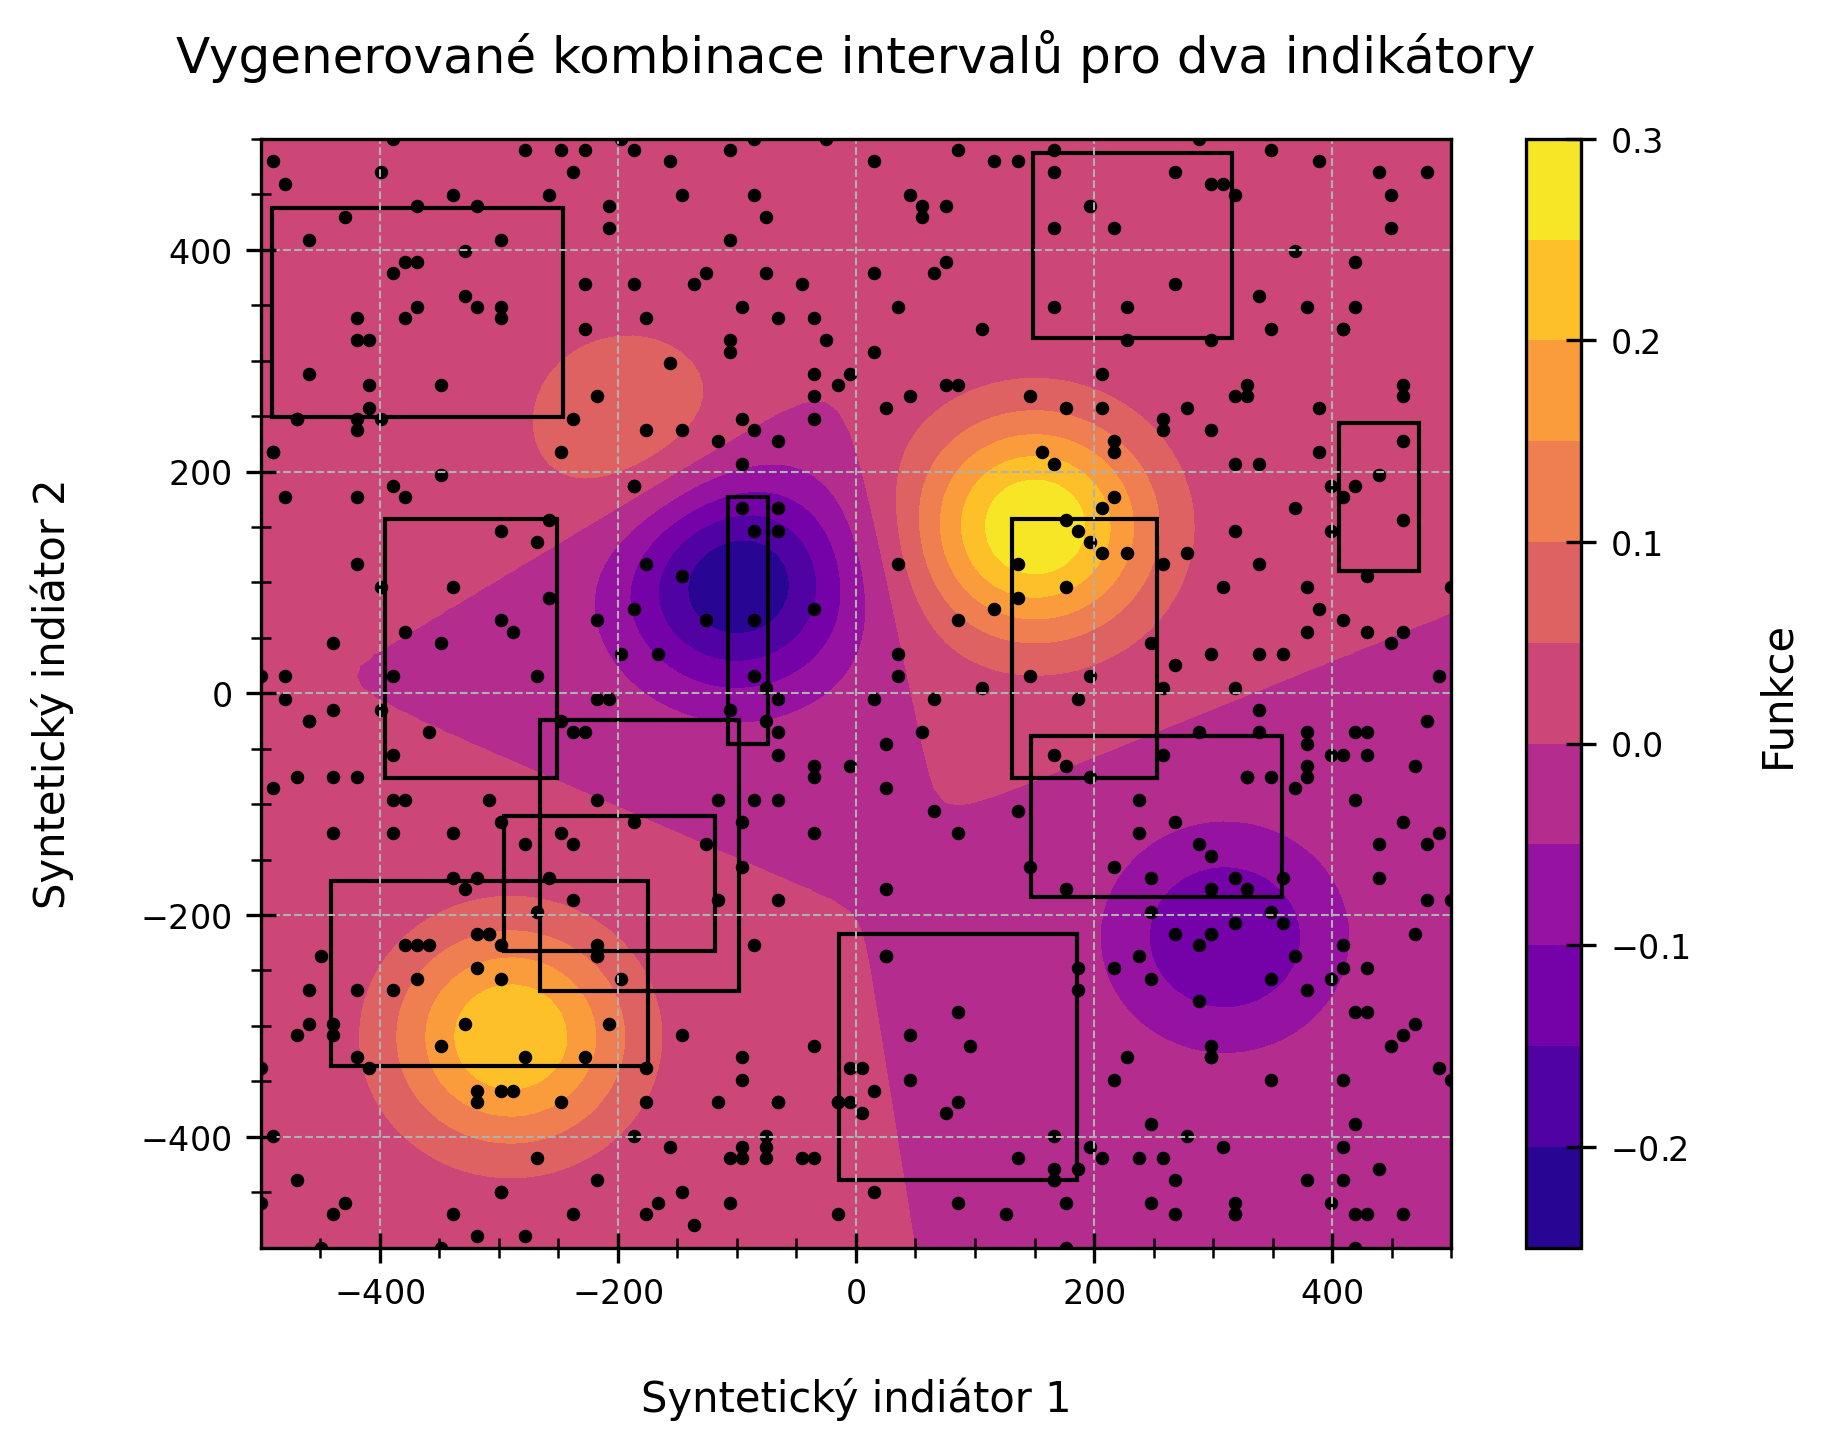

<Figure size 1920x1440 with 0 Axes>

In [11]:

# Plotting
syntheticFunction_ini = np.load(rootFunctionPath)
syntheticFunction_sampled = np.load(sampledFunctionPath)
df = pd.DataFrame({'synthetic_indicator_one': syntheticFunction_sampled['axes'][0], 'synthetic_indicator_nd': syntheticFunction_sampled['axes'][1], 'relative_profit': syntheticFunction_sampled['values']})
indicator_names = ['synthetic_indicator_one', 'synthetic_indicator_nd']

combinations = pd.read_csv(experimentSetFolder+'/Combinations_Dataset__trhd_>=_5.csv')
combinations_smaller = combinations

combinationsDataset = {}
for indicator in indicator_names:
    combinationsDataset[indicator] = np.transpose([combinations_smaller[indicator+'_min'].tolist(), combinations_smaller[indicator+'_max'].tolist()])
combinationsDataset['relative_profit'] = combinations_smaller['relative_profit'].tolist()

plotCombinationGrid2D(
    indicator_names=indicator_names,
    indicator_names_plot = ['Syntetický indiátor 1', 'Syntetický indiátor 2'],
    generatedDataset_initial=syntheticFunction_ini,
    generatedDataset_sampled=df,
    combinationsDataset=combinationsDataset,
    probabilityToPrint=0.01,
    savePlotPath=experimentSetFolder
)